<a href="https://colab.research.google.com/github/drAshcroft/MAT422/blob/main/HW_32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
from scipy import stats
import random
!pip install sympy
import sympy

We can use the sympy to perform symbolic calculations of the derivative and allow calculations of taylor approx.

-5*x**4 - 10*x**2 - 3*x + 15

Taylor expansion shows ok behavior near the 0


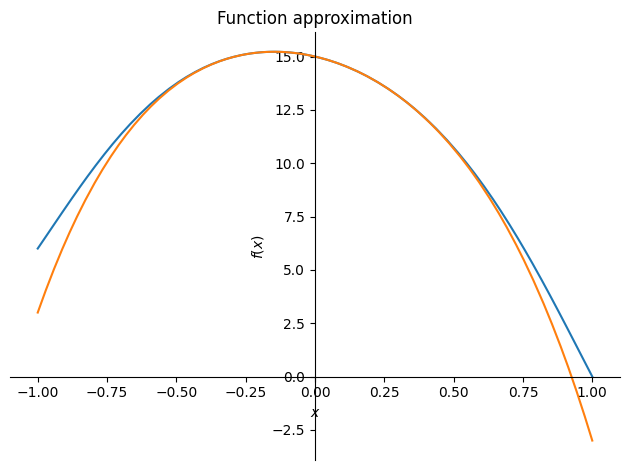

In [10]:

from sympy import *
x = sympy.Symbol('x')

eq=3*x**6-5*x**4-10*x**2-3*x+15

taylorExpand = eq.series(x, 0, 5).removeO()
display(taylorExpand)

p1 = plot(eq, (x, -1, 1), title='Function approximation' , show=False)
p2 = plot((taylorExpand), (x, -1, 1), show=False)
p1.append(p2[0])

print('Taylor expansion shows ok behavior near the 0')
p1.show()

array([6.00000000e+00, 6.00380058e+00, 6.00760156e+00, ...,
       1.00017977e-02, 5.00069977e-03, 0.00000000e+00])

Taylor expansion shows ok behavior near the 0


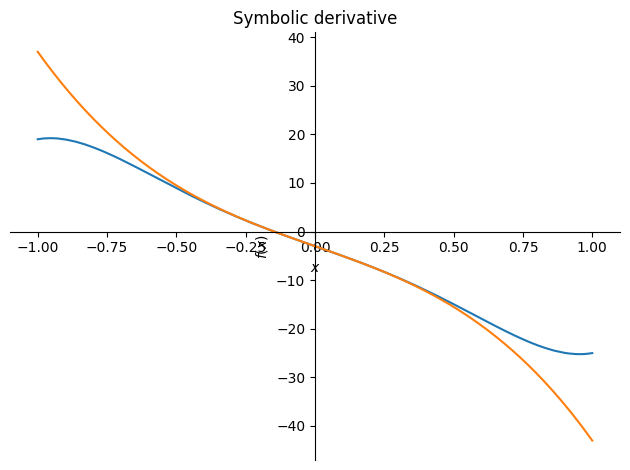

In [15]:
p1 = plot(diff(eq), (x, -1, 1), title='Symbolic derivative', show=False)
p2 = plot(diff(taylorExpand), (x, -1, 1), show=False)
p1.append(p2[0])


realDiff = lambdify(x,diff( eq), "numpy")


print('Taylor expansion shows ok behavior near the 0')
p1.show()

Performing a real derivative can be difficult as the noise is amplified by the timestep.  The derivative can easily to completely obsscured by even a little noise

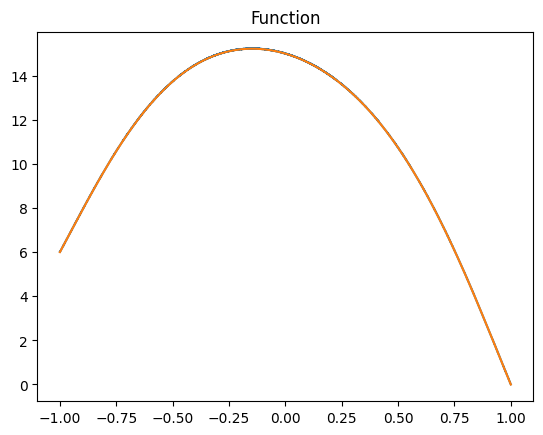

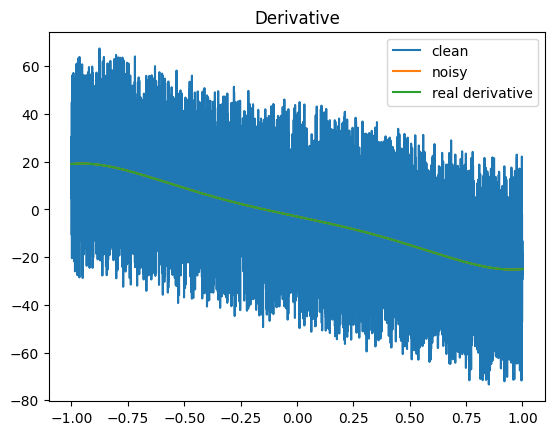

In [17]:
import matplotlib.pyplot as plt
x= np.linspace(-1, 1,10000)
e= (np.max(x)-np.min(x))/len(x)
F= 3*x**6-5*x**4-10*x**2-3*x+15
f = F + .01*np.random.ranf(len(x))  # add a small amount of noise to signal

plt.title("Function")
plt.plot(x,f, label='Clean')
plt.plot(x,F, label='Noise')
plt.show()

plt.title("Derivative")
plt.plot(x[1:],  np.diff(f)/e,label= 'clean')
plt.plot(x[1:],  np.diff(F)/e,label= 'noisy')
plt.plot(x[1:],realDiff(x[1:]),label='real derivative')
plt.legend()

One way to overcome this is to perform the numerical equivalent of a taylor series expansion and perform a polyfit to get the linear regression and then use that to form a derviative that can be accurate near the center of the .

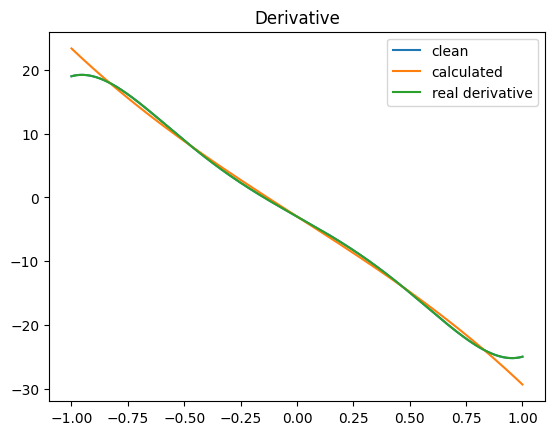

In [23]:
p=np.polyfit(x,f,5)
cf=np.polyval(p,x)

plt.title("Derivative")
plt.plot(x[1:], np.diff(F)/e   , label= 'clean')
plt.plot(x[1:], np.diff(cf)/e  , label= 'calculated')
plt.plot(x[1:], realDiff(x[1:]), label='real derivative')
plt.legend()

In [21]:
x.shape

(10000,)